In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

print ("Packages are loaded")

Packages are loaded


In [2]:
tf.__version__

'1.2.0'

In [3]:
learning_rate = 0.1
num_epochs = 30000
step_display = 1000

In [4]:
x = [2.7, 4.8, 9.3, 13.4, 24.8, 31.3, 48.5, 53.0, 68.1, 74.2, 88.6, 94.5]
y = [7.0, 28.8, 22.8, 67.1, 48.8, 100.2, 140.0, 190.2, 215.2, 285.6, 260.3, 251.1]

In [5]:
assert len(x) == len(y)

In [6]:
len(x)

12

In [7]:
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0, name='weight'))
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0, name='bias'))

In [8]:
x_true = tf.placeholder(dtype=tf.float32, name='x_true')
y_true = tf.placeholder(dtype=tf.float32, name='y_true')

In [9]:
y_pred = tf.add(tf.multiply(weight, x_true), bias)

In [10]:
cost = tf.reduce_mean(tf.square(y_pred - y_true))

In [11]:
optimizer = tf.train.AdadeltaOptimizer(learning_rate).minimize(cost)

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [13]:
for epoch in range(num_epochs):
    _, c = sess.run([optimizer, cost], feed_dict={x_true:x, y_true:y})
    if (epoch+1) % step_display == 0:
        print ("Epoch: {0}, cost: {1}, weight: {2}, bias: {3}".format(epoch+1, c, sess.run(weight), sess.run(bias)))
print("Optmization is done")

Epoch: 1000, cost: 34899.38671875, weight: [-0.38151664], bias: [-0.2288532]
Epoch: 2000, cost: 32998.23046875, weight: [-0.28509769], bias: [-0.13241659]
Epoch: 3000, cost: 30771.28515625, weight: [-0.16849257], bias: [-0.01577104]
Epoch: 4000, cost: 28344.69921875, weight: [-0.03642397], bias: [ 0.11636986]
Epoch: 5000, cost: 25811.2421875, weight: [ 0.10778258], bias: [ 0.26068985]
Epoch: 6000, cost: 23243.98828125, weight: [ 0.26151562], bias: [ 0.41458735]
Epoch: 7000, cost: 20701.94921875, weight: [ 0.42259562], bias: [ 0.57589233]
Epoch: 8000, cost: 18232.884765625, weight: [ 0.58913672], bias: [ 0.74272895]
Epoch: 9000, cost: 15875.0595703125, weight: [ 0.7594648], bias: [ 0.91343373]
Epoch: 10000, cost: 13658.40625, weight: [ 0.932069], bias: [ 1.08650756]
Epoch: 11000, cost: 11605.3623046875, weight: [ 1.10557652], bias: [ 1.26058209]
Epoch: 12000, cost: 9731.99609375, weight: [ 1.27869475], bias: [ 1.43439698]
Epoch: 13000, cost: 8048.06103515625, weight: [ 1.45025122], bias

In [14]:
training_cost = sess.run(cost, feed_dict={x_true:x, y_true:y})
print ("Final cost: {}".format(c))
print ("Final weight: {}".format(sess.run(weight)))
print ("Final bias: {}".format(sess.run(bias)))

Final cost: 613.8670654296875
Final weight: [ 3.03870487]
Final bias: [ 3.68522477]


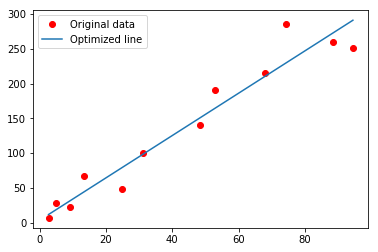

In [15]:
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, sess.run(weight) * x + sess.run(bias), label='Optimized line')
plt.legend()
plt.show()

In [16]:
sess.close()